## Importing the libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

## Reading the Datasets

In [2]:
df = pd.read_csv("C:\\Users\\Shivam kumar\\Desktop\\Covid data\\covid-data.csv")

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


### Gathering basic info from the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52873 entries, 0 to 52872
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         52571 non-null  object 
 1   continent                        52269 non-null  object 
 2   location                         52873 non-null  object 
 3   date                             52873 non-null  object 
 4   total_cases                      49259 non-null  float64
 5   new_cases                        51979 non-null  float64
 6   new_cases_smoothed               51185 non-null  float64
 7   total_deaths                     40323 non-null  float64
 8   new_deaths                       51979 non-null  float64
 9   new_deaths_smoothed              51185 non-null  float64
 10  total_cases_per_million          48993 non-null  float64
 11  new_cases_per_million            51915 non-null  float64
 12  new_cases_smoothed

#### Extracting the country data

In [5]:
country_df = df.location.unique()

In [6]:
country_df.size

214

In [7]:
indexer = df[df['location']=='India'].index
india_tc = df.loc[indexer,'date' :'total_cases']
india_tc = india_tc.dropna()
india_tc.set_index('date', inplace = True)

In [8]:
india_tc

,total_cases
date,
2020-01-30,1.0
2020-01-31,1.0
2020-02-01,1.0
2020-02-02,2.0
2020-02-03,2.0
...,...
2020-10-23,7761312.0
2020-10-24,7814682.0
2020-10-25,7864811.0


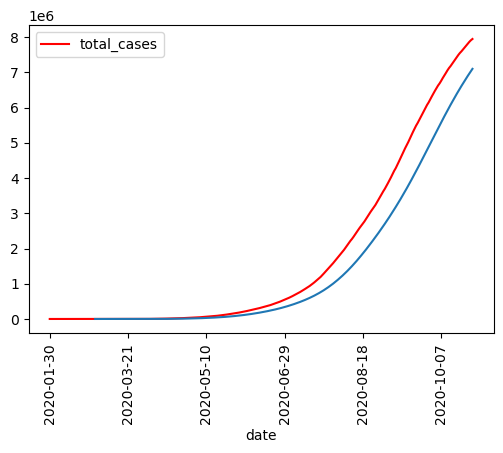

In [9]:
india_tc.plot(figsize= (6,4), color ='red')
india_tc.rolling(window = 30).mean()['total_cases'].plot() #moving average per 30 days 
plt.xticks(rotation=90)
plt.show()

### Did Lockdown work ?

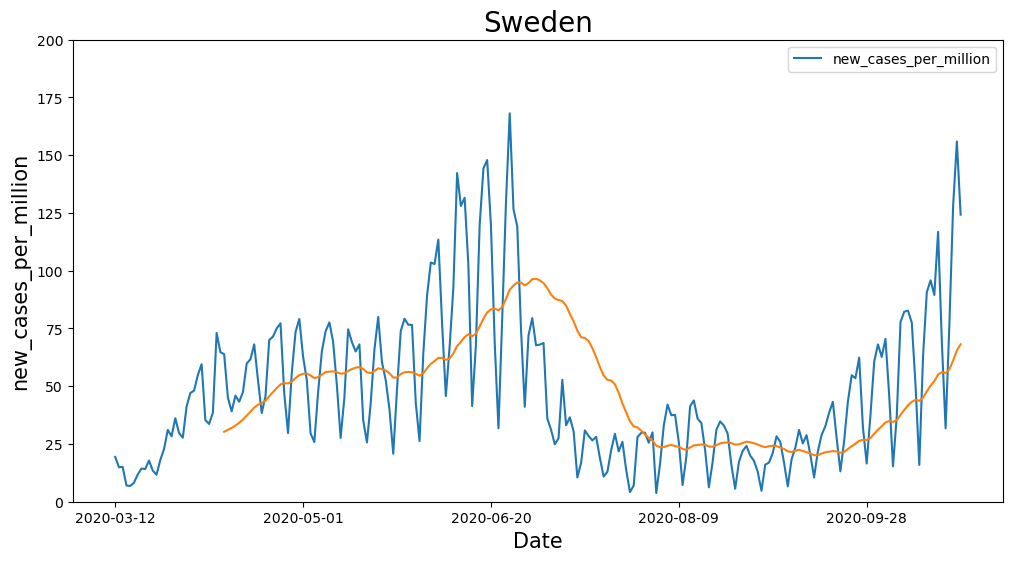

In [10]:
def plot_covid_data(country, col, plot_ma= False, y_max= 200):
    indexer = df[df['location']==country].index
    country_df = df.loc[indexer,'date' : col]
    country_df = country_df.dropna()
    country_df.set_index('date', inplace = True)
    country_df.drop(country_df.columns.difference([col]),axis= 1,inplace=True)
    country_df.plot(figsize= (12,6))
    plt.ylim(0,y_max)

    if plot_ma:
        country_df.rolling(window=30).mean()[col].plot()
        
plot_covid_data('Sweden','new_cases_per_million',True) #Sweden didn't lockdown
plt.xlabel('Date',size = 15)
plt.ylabel('new_cases_per_million',size = 15)
plt.title('Sweden',size = 20)
plt.show()

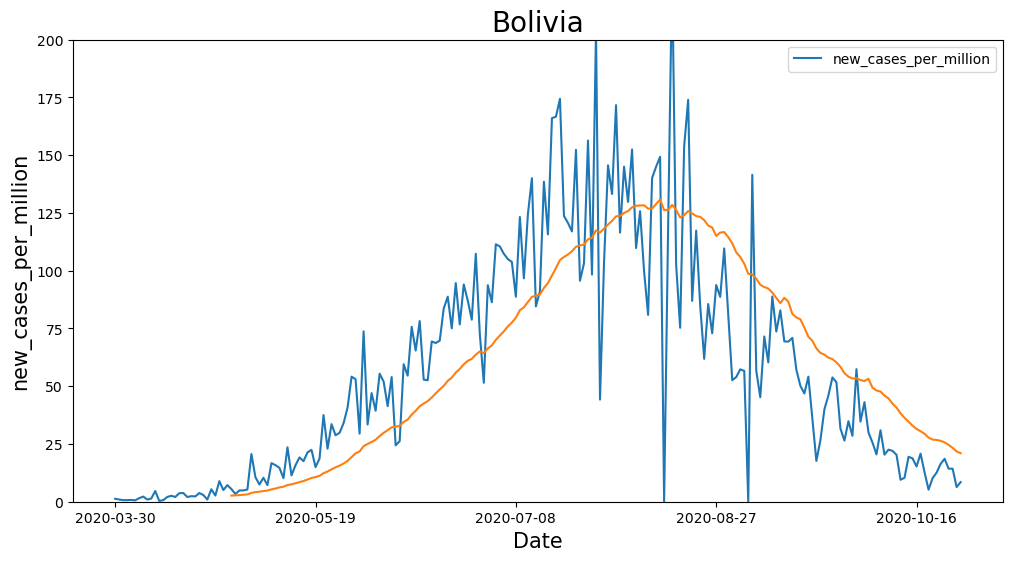

In [11]:
plot_covid_data('Bolivia','new_cases_per_million',True) #Bolivia lockdown a lot
plt.xlabel('Date',size = 15)
plt.ylabel('new_cases_per_million',size = 15)
plt.title('Bolivia',size = 20)
plt.show()

##### Conclusion: Yes, lockdown helped in controlling the spread of covid 19.

### How Did Median Age Effect Death Rate ?

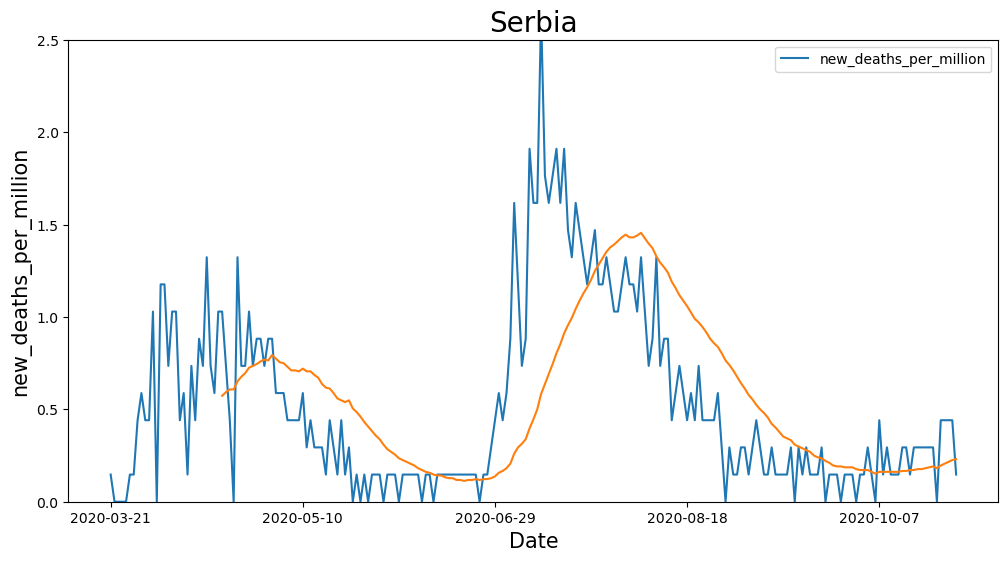

In [12]:
plot_covid_data('Serbia','new_deaths_per_million',True,2.5) # serbia has very low median age
plt.xlabel('Date',size = 15)
plt.ylabel('new_deaths_per_million',size = 15)
plt.title('Serbia',size = 20)
plt.show()

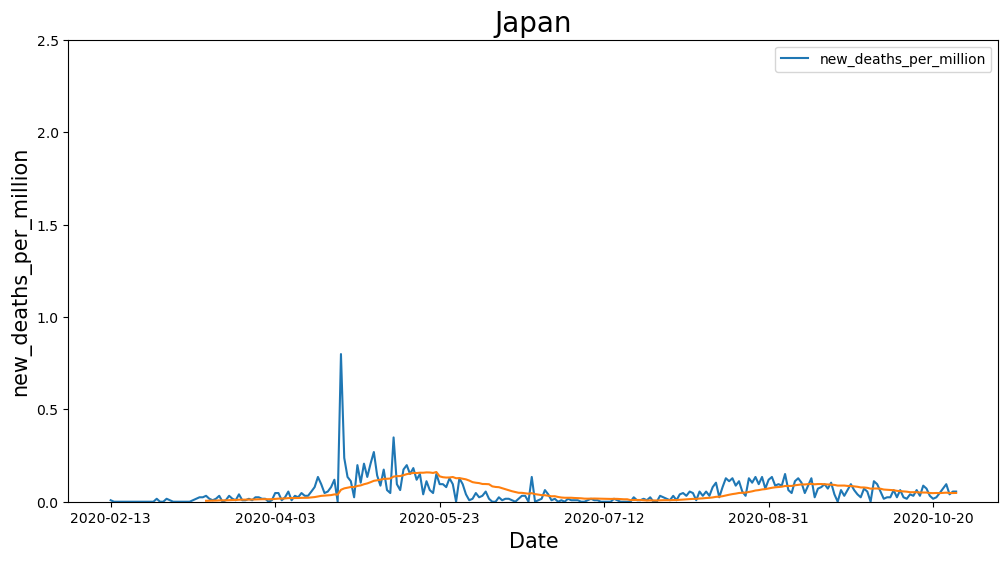

In [13]:
plot_covid_data('Japan','new_deaths_per_million',True,2.5) #Japan has very high median age
plt.xlabel('Date',size = 15)
plt.ylabel('new_deaths_per_million',size = 15)
plt.title('Japan',size = 20)
plt.show()

##### Conclusion :  If we compare Serbia to Japan, then we can see that despite of having higher median age of Japan, they have lesser death per million.

### How Does Obesity Effect Death Rate

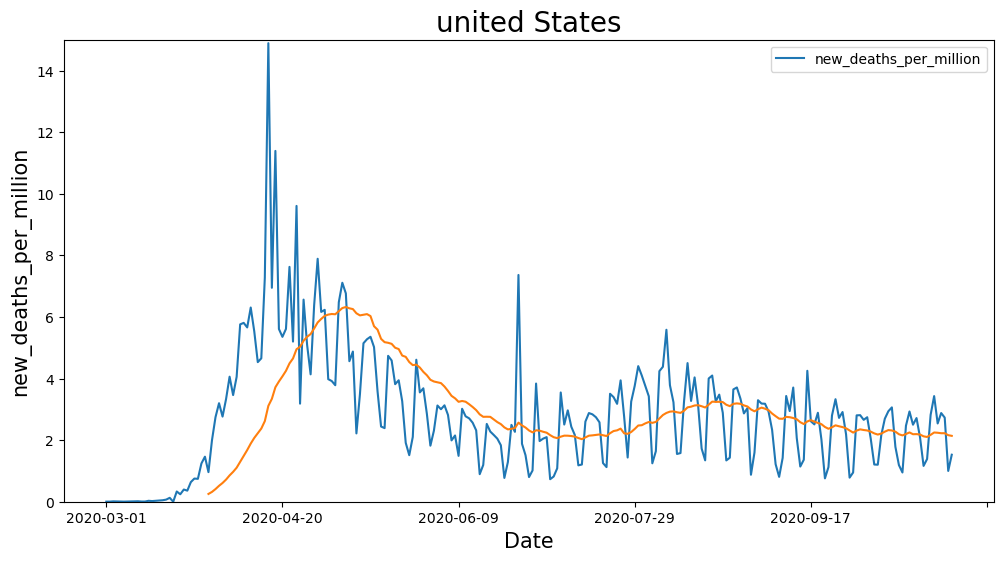

In [14]:
plot_covid_data('United States','new_deaths_per_million',True,15) #United States has very high obesity rate
plt.xlabel('Date',size = 15)
plt.ylabel('new_deaths_per_million',size = 15)
plt.title('united States',size = 20)
plt.show()

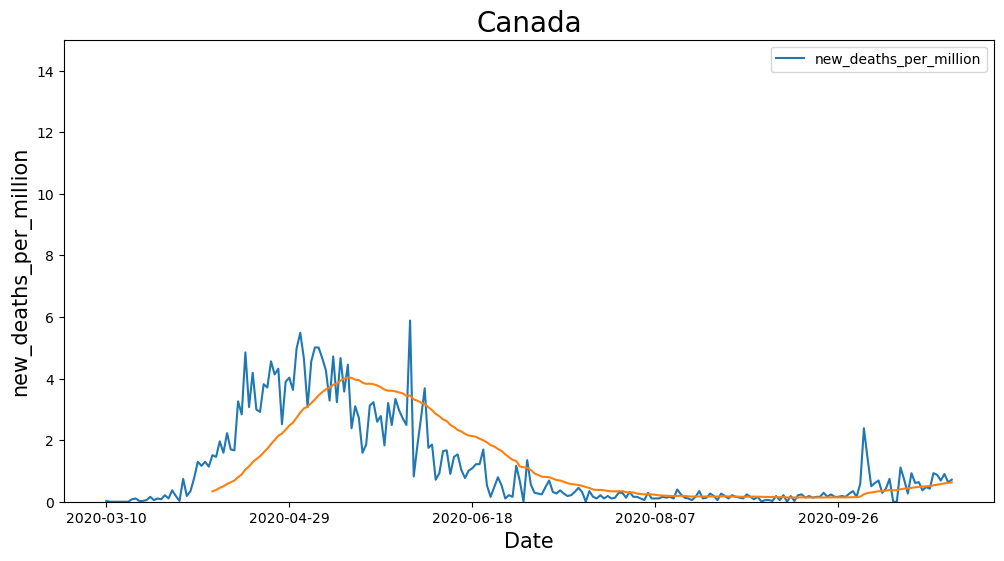

In [15]:
plot_covid_data('Canada','new_deaths_per_million',True,15) #Canada has relatively high obesity rate
plt.xlabel('Date',size = 15)
plt.ylabel('new_deaths_per_million',size = 15)
plt.title('Canada',size = 20)
plt.show()

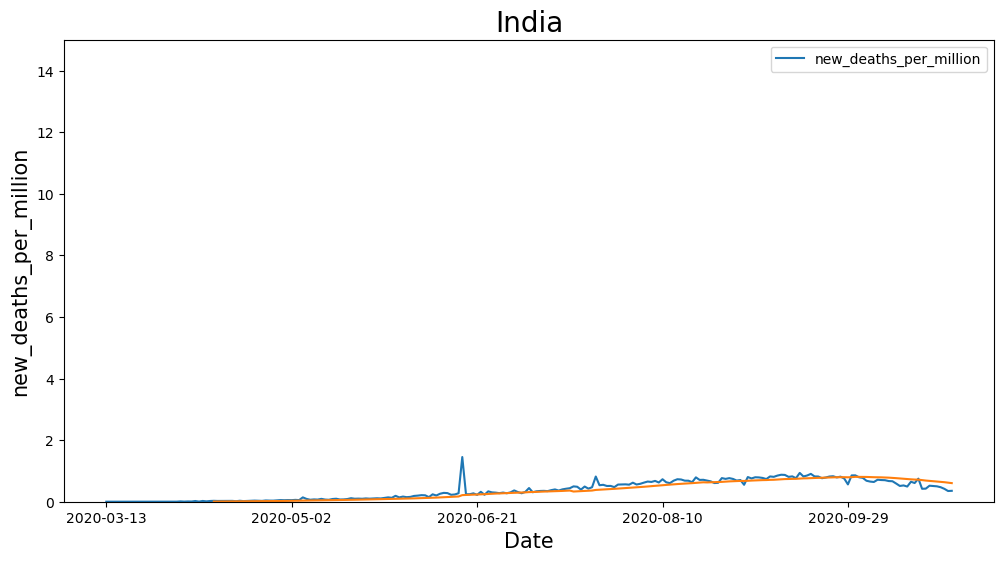

In [16]:
plot_covid_data('India','new_deaths_per_million',True,15) #India has relatively low obesity rate
plt.xlabel('Date',size = 15)
plt.ylabel('new_deaths_per_million',size = 15)
plt.title('India',size = 20)
plt.show()

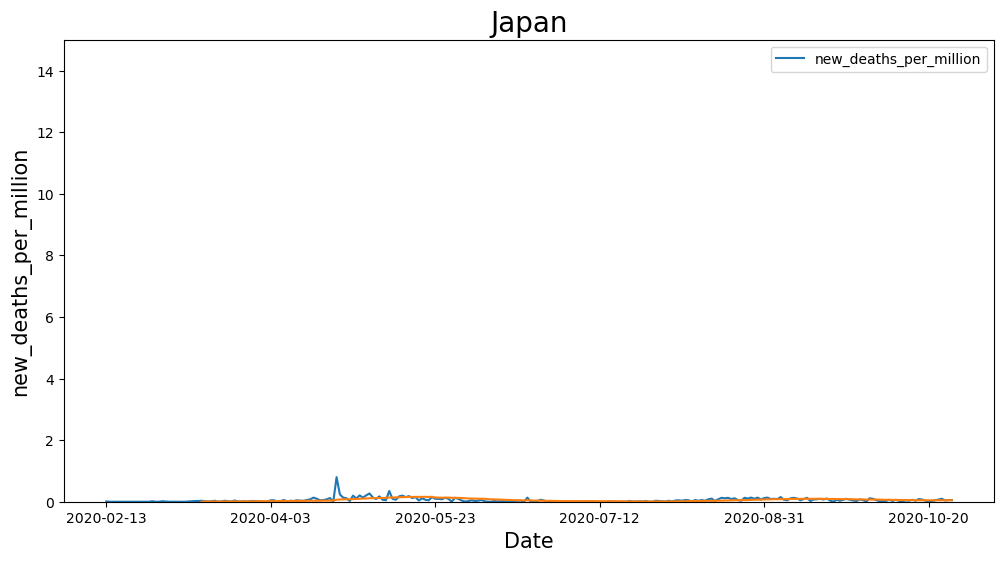

In [17]:
plot_covid_data('Japan','new_deaths_per_million',True,15) #Japan has low obesity rate
plt.xlabel('Date',size = 15)
plt.ylabel('new_deaths_per_million',size = 15)
plt.title('Japan',size = 20)
plt.show()

##### Conclusion : The contries having lesser obesity rate, they have lesser death per million.

### How Does Diabetes Prevalence Effect Death ?

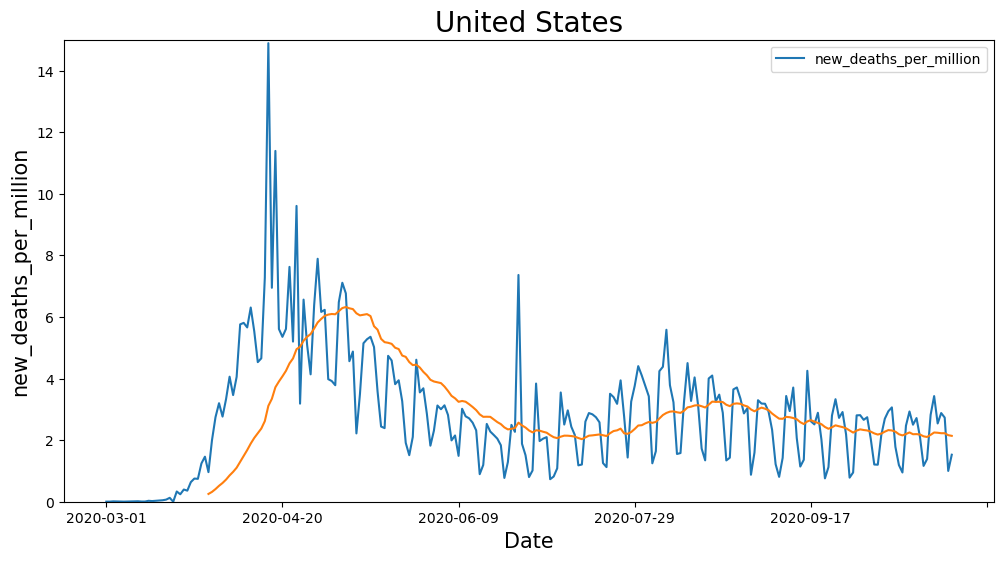

In [18]:
plot_covid_data('United States','new_deaths_per_million',True,15) #United States has high diabetes rate
plt.xlabel('Date',size = 15)
plt.ylabel('new_deaths_per_million',size = 15)
plt.title('United States',size = 20)
plt.show()

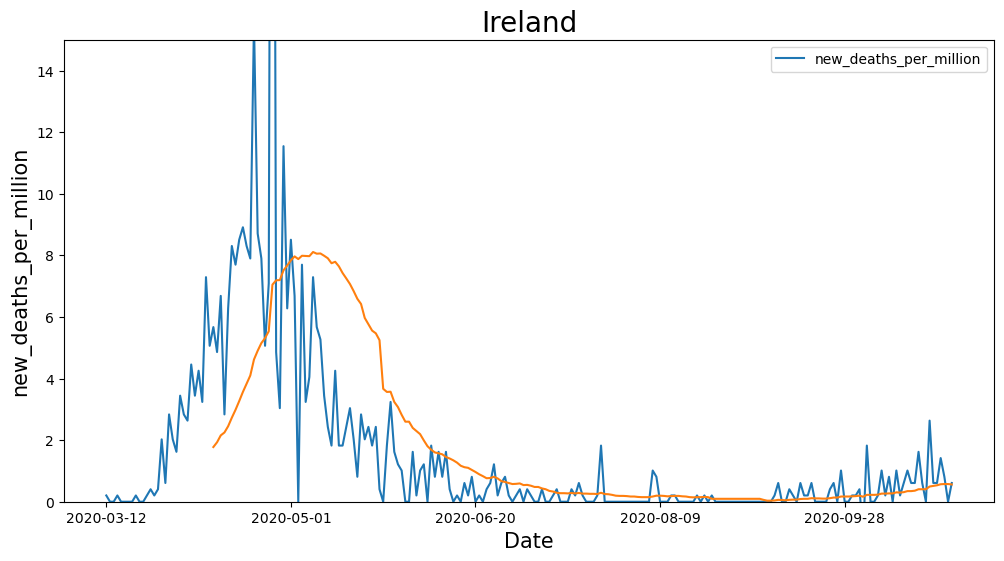

In [19]:
plot_covid_data('Ireland','new_deaths_per_million',True,15) #Ireland has low diabetes rate
plt.xlabel('Date',size = 15)
plt.ylabel('new_deaths_per_million',size = 15)
plt.title('Ireland',size = 20)
plt.show()

##### Conclusion : The country having lesser diabetes prevalence have lesser death per million.

### Does More Testing Slow Deathrate ?

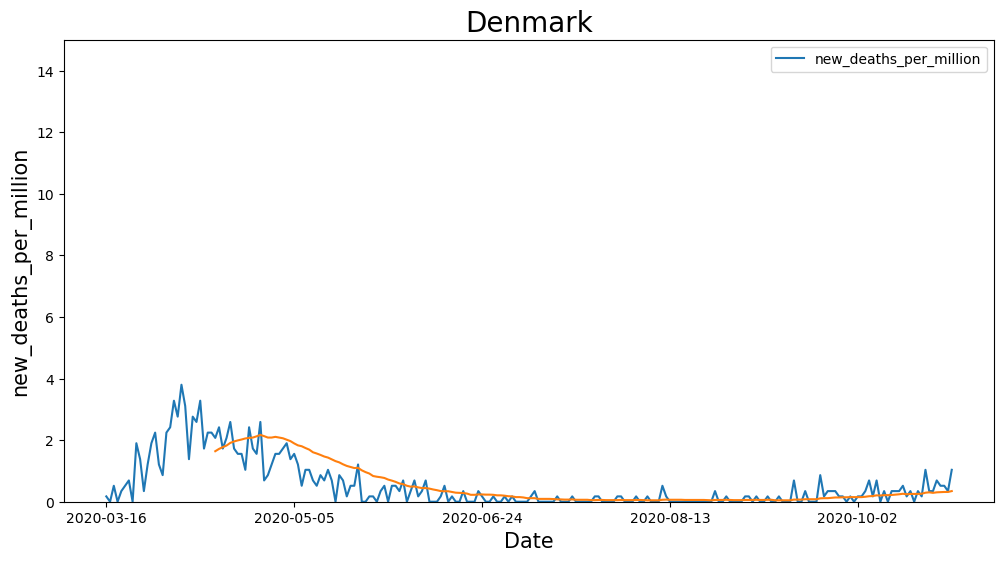

In [20]:
plot_covid_data('Denmark','new_deaths_per_million',True,15) #Denmark High no of testing 
plt.xlabel('Date',size = 15)
plt.ylabel('new_deaths_per_million',size = 15)
plt.title('Denmark',size = 20)
plt.show()

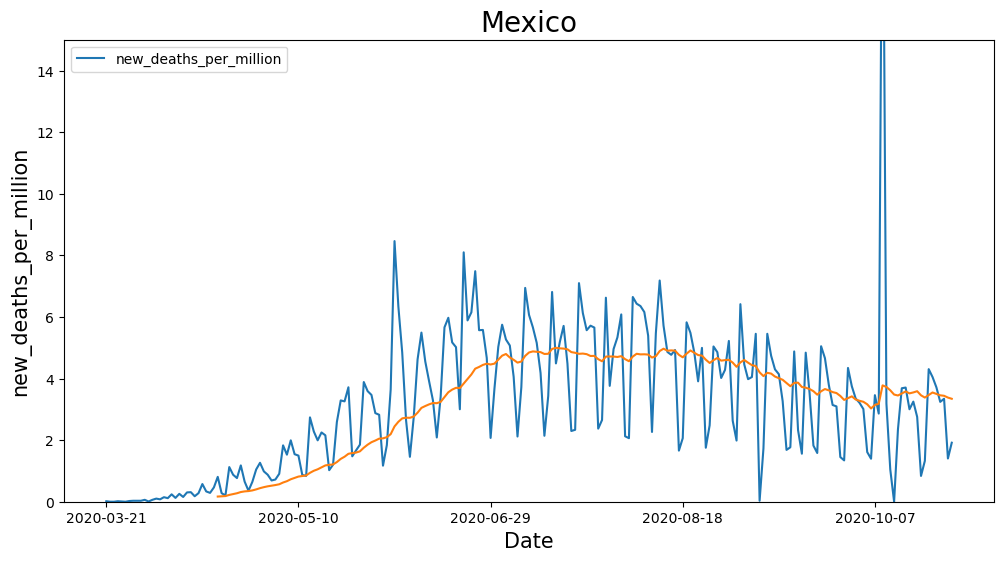

In [21]:
plot_covid_data('Mexico','new_deaths_per_million',True,15) #Mexico did low no of testing 
plt.xlabel('Date',size = 15)
plt.ylabel('new_deaths_per_million',size = 15)
plt.title('Mexico',size = 20)
plt.show()

##### Conclusion : Providing more testing is helping to lower the death rate.

## Analysing the whole dataset

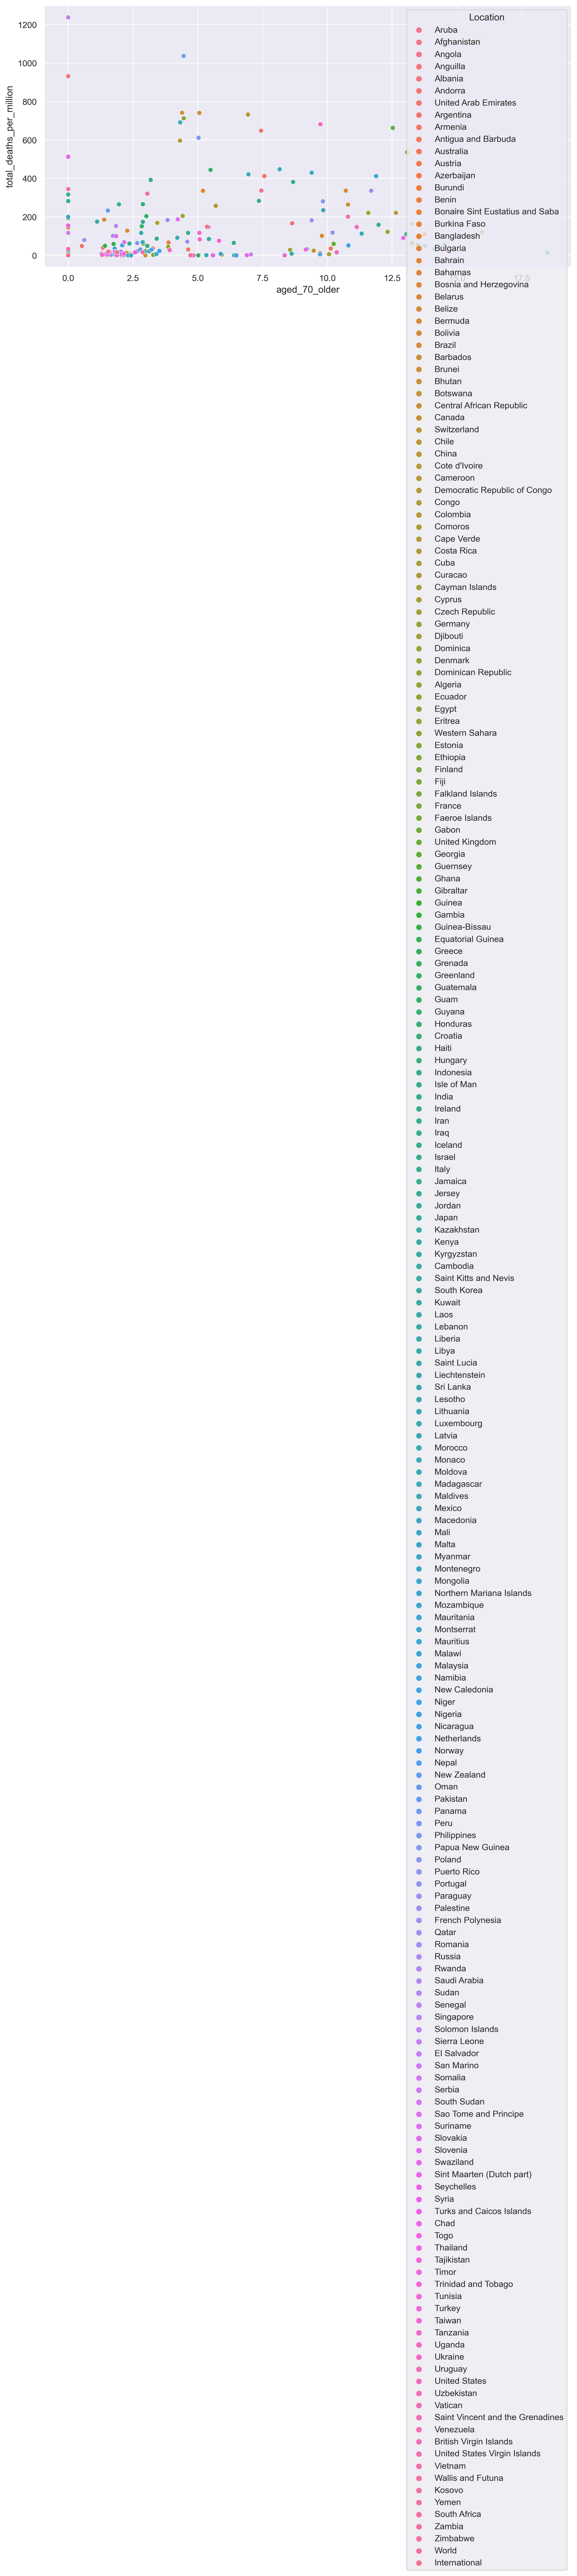

In [53]:
def scatter_plot(date,col1,col2):
    total_df = pd.DataFrame(columns = ['date','location', col1,col2])
    for c in country_df:
        temp_df = df[(df['location']==c) & (df['date']==date)][['date','location',col1,col2]]
        total_df = pd.concat([total_df, temp_df], ignore_index=True).fillna(0)
    total_df.set_index('date',inplace = True)
    
    plt.figure(figsize=(12,6),dpi = 300)
    sns.set(style='darkgrid')
    sns.scatterplot(data = total_df, x= col2, y= col1,markers=True,hue= 'location')
    plt.legend(title='Location', loc='best');
    
scatter_plot('2020-10-27','total_deaths_per_million','aged_70_older')    